# Описание задачи
Для лечения некоторого редкого заболевания было изобретено новое дорогостоящее лекарство, которое должно заменить менее эффективное, но более дешевое существующее. Перед его назначением у пациента берутся специальные анализы, которые могут помочь определить потенциальное течение болезни и действенность лекарства.

Ваша задача – на основе результатов этих анализов для каждого пациента из тестовой выборки предсказать, будет ли у него вылечена болезнь новым лекарством.

Описание данных

Обучающая (train.csv) и тестовая (test.csv) выборки состоят из обезличенных признаков каждого пациента, соответствующих результатам анализов. В обучающем датасете есть целевой признак target (была ли вылечена болезнь лекарством), принимающий значения 0 и 1.

Пример сабмита можно посмотреть в файле sample_submission.csv. Он содержит единственную колонку target, порядок соответсвует порядку данных в тестовом датасете.

Метрика качества

В качесте метрики качества используется метрика F1-score. Для локальной валидации можно использовать 

# load libs

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA, KernelPCA

In [111]:
data = pd.read_csv('train.csv')
data_p = pd.read_csv('test.csv')

X = data.drop(columns=['target'])
X_no5 = X.drop(columns=['5'])
y = data['target']

data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,1.095934,-3.077774,-2.619091,5.128201,1.228476,...,0.392978,4.920467,16.610460,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145,0
1,5.161836,-6.514011,-7.474612,-4.544336,-13.081404,1.637562,-1.094672,-1.253545,-2.955342,-10.958200,...,-4.840233,-0.514308,4.613289,2.391302,-4.795664,4.208278,-2.017168,-8.510424,10.806639,0
2,-2.971550,-21.508184,-1.125457,1.524129,3.027444,1.045879,1.551050,1.512075,-1.955564,3.683893,...,-0.385303,2.647917,-2.200556,1.058671,1.076312,-7.802389,-7.553953,0.636639,14.274950,0
3,6.724419,0.566489,0.509764,-4.524162,10.367236,2.083270,0.741790,-2.077787,-2.912744,-4.040637,...,4.731346,15.378418,-14.031666,2.659410,5.123620,-8.500321,3.417960,-14.798490,-6.132800,1
4,-2.213659,-4.678213,-0.135845,2.375933,0.916649,1.027195,-0.353265,-0.220609,-3.416823,-5.964181,...,1.598330,-4.996614,4.504269,1.918961,-2.076223,0.154039,-2.016779,10.803205,5.942927,0


In [84]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,1.095934,-3.077774,-2.619091,5.128201,1.228476,...,0.392978,4.920467,16.610460,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145,0
1,5.161836,-6.514011,-7.474612,-4.544336,-13.081404,1.637562,-1.094672,-1.253545,-2.955342,-10.958200,...,-4.840233,-0.514308,4.613289,2.391302,-4.795664,4.208278,-2.017168,-8.510424,10.806639,0
2,-2.971550,-21.508184,-1.125457,1.524129,3.027444,1.045879,1.551050,1.512075,-1.955564,3.683893,...,-0.385303,2.647917,-2.200556,1.058671,1.076312,-7.802389,-7.553953,0.636639,14.274950,0
3,6.724419,0.566489,0.509764,-4.524162,10.367236,2.083270,0.741790,-2.077787,-2.912744,-4.040637,...,4.731346,15.378418,-14.031666,2.659410,5.123620,-8.500321,3.417960,-14.798490,-6.132800,1
4,-2.213659,-4.678213,-0.135845,2.375933,0.916649,1.027195,-0.353265,-0.220609,-3.416823,-5.964181,...,1.598330,-4.996614,4.504269,1.918961,-2.076223,0.154039,-2.016779,10.803205,5.942927,0


In [85]:
data.shape, data.dtypes

((6963, 32),
 0         float64
 1         float64
 2         float64
 3         float64
 4         float64
 5         float64
 6         float64
 7         float64
 8         float64
 9         float64
 10        float64
 11        float64
 12        float64
 13        float64
 14        float64
 15        float64
 16        float64
 17        float64
 18        float64
 19        float64
 20        float64
 21        float64
 22        float64
 23        float64
 24        float64
 25        float64
 26        float64
 27        float64
 28        float64
 29        float64
 30        float64
 target      int64
 dtype: object)

In [86]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', 'target'],
      dtype='object')

In [128]:
data.   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,target
0,1.000000,-0.150504,-0.031684,-0.119729,-0.429410,-0.012056,0.163108,0.060768,0.013848,-0.104773,0.237665,0.149895,-0.091785,0.016672,0.016753,-0.477741,-0.043302,-0.015497,-0.152718,0.190584,-0.096562,0.178463,0.164363,-0.125456,-0.337168,-0.061916,-0.153491,-0.173254,0.052345,-0.144753,-0.018940,-0.009456
1,-0.150504,1.000000,0.249603,0.041488,-0.039483,-0.019360,-0.195778,-0.191716,0.127857,-0.199508,0.139047,-0.166060,0.237614,0.112427,-0.468066,-0.122787,-0.137192,-0.213601,-0.007135,0.053529,-0.260690,-0.121946,0.259262,-0.006155,0.190114,-0.307530,-0.137446,0.392216,0.284322,-0.005216,-0.143356,-0.016829
2,-0.031684,0.249603,1.000000,0.013315,0.263741,-0.013336,0.117693,0.024842,0.262330,0.401124,-0.010746,0.129228,0.208119,-0.033604,0.093598,-0.245421,0.004657,0.009416,0.054872,0.022424,0.081488,0.205685,0.020286,-0.248789,-0.019600,-0.019678,0.114791,0.122596,-0.046960,0.226250,-0.265365,-0.013655
3,-0.119729,0.041488,0.013315,1.000000,-0.045332,0.031096,-0.109396,0.100969,0.069063,0.242621,-0.075826,-0.156553,-0.121246,0.027686,0.049728,0.220741,0.085964,0.086544,0.108206,0.098086,0.101832,-0.113575,-0.116189,-0.373033,0.080756,-0.036977,-0.031316,-0.190707,-0.002422,0.313397,0.228647,0.030377
4,-0.429410,-0.039483,0.263741,-0.045332,1.000000,0.011108,0.205774,-0.104539,-0.077366,0.363558,0.149486,0.315509,0.347398,-0.082398,-0.044043,0.165506,-0.157620,-0.110253,-0.084899,-0.246415,0.266201,0.093359,-0.156819,0.144513,-0.147485,0.351241,0.550878,-0.319312,0.023675,-0.178696,-0.092773,0.004322
5,-0.012056,-0.019360,-0.013336,0.031096,0.011108,1.000000,0.018631,0.011494,-0.012974,0.012688,-0.010025,-0.010713,0.004208,-0.005868,-0.007907,0.011811,-0.001283,0.044798,0.013623,0.007402,0.011574,0.000399,0.019587,-0.002047,0.009151,-0.007322,0.015552,-0.020115,-0.026939,-0.002515,0.037116,0.858760
6,0.163108,-0.195778,0.117693,-0.109396,0.205774,0.018631,1.000000,0.036156,0.112151,0.173130,0.057142,0.109011,0.069086,0.082227,0.152229,-0.052662,-0.157322,-0.086236,-0.155509,0.107351,-0.026385,0.304553,-0.089440,-0.113735,-0.239311,0.106869,0.170283,-0.204228,0.137407,-0.358567,0.226725,0.011769
7,0.060768,-0.191716,0.024842,0.100969,-0.104539,0.011494,0.036156,1.000000,0.019800,-0.029455,0.027291,-0.018671,0.054347,0.235482,0.114687,-0.293454,-0.065363,0.229125,-0.016963,0.036256,-0.118520,-0.154843,-0.092679,-0.253981,-0.334525,0.067639,0.026509,-0.317490,-0.059970,0.192219,0.486808,0.016147
8,0.013848,0.127857,0.262330,0.069063,-0.077366,-0.012974,0.112151,0.019800,1.000000,0.182448,0.067739,0.007979,-0.025197,0.023483,0.130461,-0.332310,-0.006108,-0.083296,0.032218,0.186428,0.144517,0.387476,-0.114682,-0.307185,0.159375,0.085408,-0.033855,0.131899,-0.109823,-0.115349,-0.171463,-0.013129
9,-0.104773,-0.199508,0.401124,0.242621,0.363558,0.012688,0.173130,-0.029455,0.182448,1.000000,-0.104576,0.239475,0.236683,-0.185186,0.285566,-0.032965,0.091770,-0.162260,-0.068708,0.410856,0.328781,0.417740,-0.355922,-0.065667,-0.070035,0.082072,0.296589,-0.210119,-0.224147,-0.140438,-0.172007,0.010100


In [87]:
list_vals0 = data.iloc[:, 0]
list_vals0

0      -6.130724
1       5.161836
2      -2.971550
3       6.724419
4      -2.213659
          ...   
6958    1.554111
6959    5.341612
6960   -2.348591
6961    5.481595
6962    0.939142
Name: 0, Length: 6963, dtype: float64

In [88]:
data.shape

(6963, 32)

(<AxesSubplot:>,
 count    6963.000000
 mean        0.287233
 std         0.452503
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         1.000000
 max         1.000000
 Name: target, dtype: float64,
 0    4963
 1    2000
 Name: target, dtype: int64)

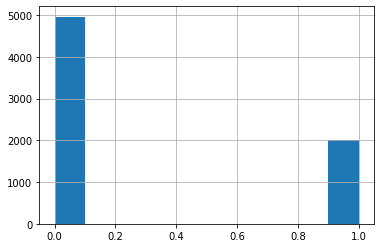

In [89]:
data['target'].hist(), data['target'].describe(), data['target'].value_counts()

Построим парыне распределения каждой метки для каждого признака

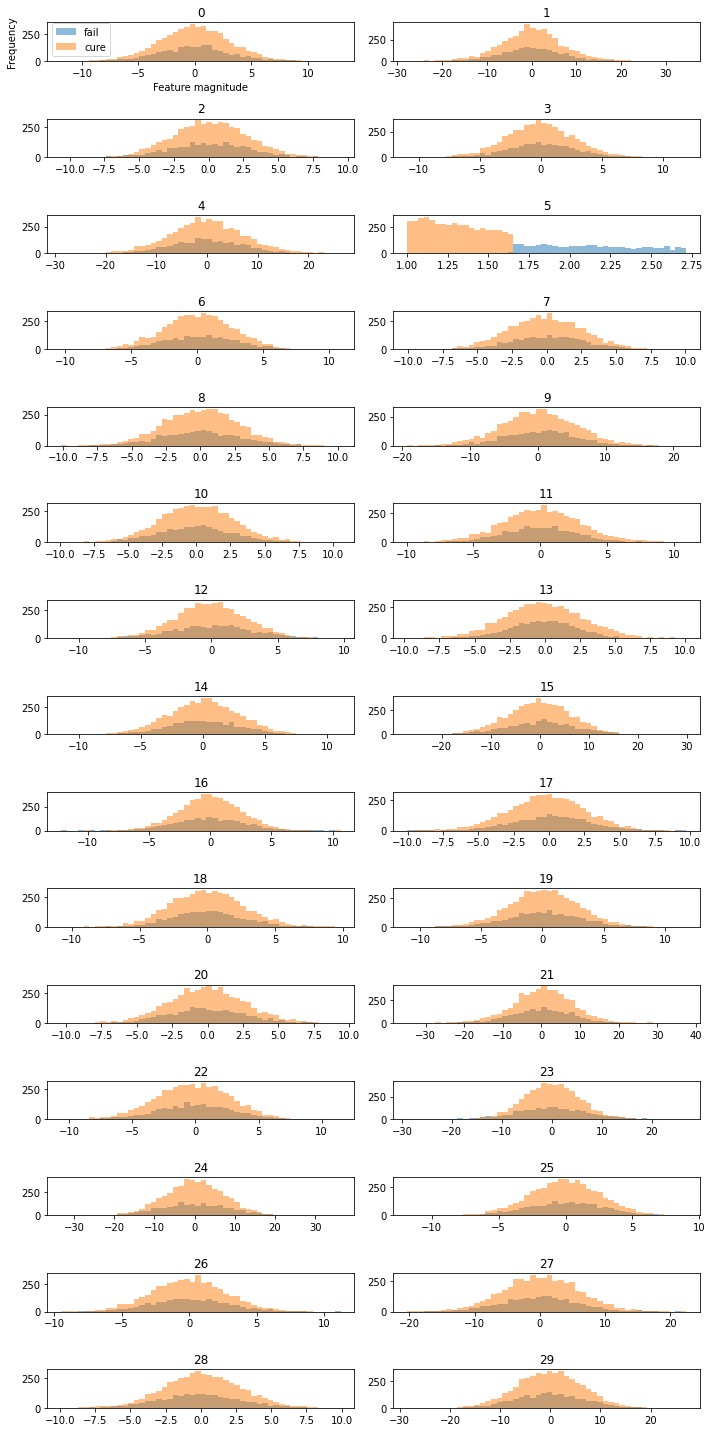

In [90]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

fail = data[data.target == 1]
cure = data[data.target == 0]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(data.iloc[:, i], bins=50)
    ax[i].hist(fail.iloc[:, i], bins=bins, alpha=.5)
    ax[i].hist(cure.iloc[:, i], bins=bins, alpha=.5)
    ax[i].set_title(i)

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["fail", "cure"], loc="best")

fig.tight_layout()

Интересно, что пятный столбец имеет другое распределение

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='5'>,
        <AxesSubplot:xlabel='5', ylabel='5'>]], dtype=object)

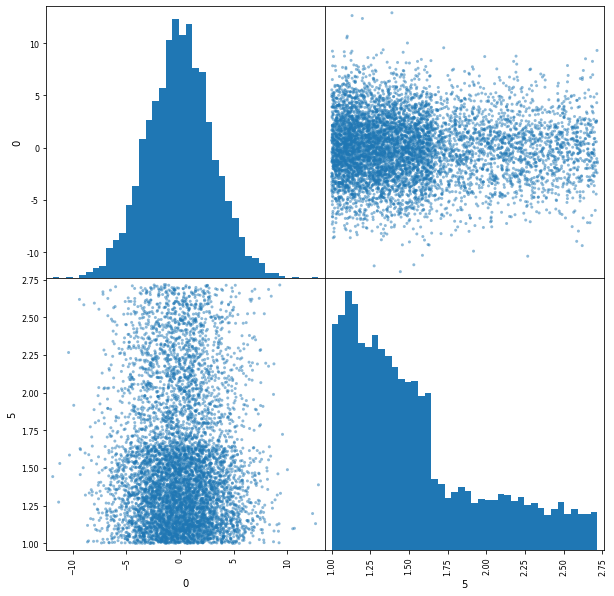

In [91]:
index_0_5 = pd.Index(['0', '5'])

pd.plotting.scatter_matrix(data[index_0_5], figsize=(10, 10), hist_kwds={'bins':40})

array([[<AxesSubplot:title={'center':'5'}>]], dtype=object)

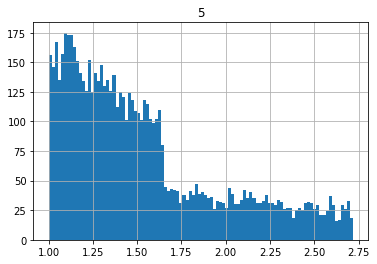

In [92]:
data.hist(column=['5'], bins=100)

In [93]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
data_norm = scaller.fit_transform(data.iloc[:, 0:-1])
data_norm = pd.DataFrame(data_norm, columns=data.columns[0:-1])
data_norm['target'] = data['target']

In [94]:
i = 6

# data_plot = data_[0+500*i:500+500*i]
data_plot = data_norm

# for i in data.columns:
#     data_plot.plot.scatter(x='5', y=i, c='target', colormap='viridis')

array([[<AxesSubplot:title={'center':'5'}>]], dtype=object)

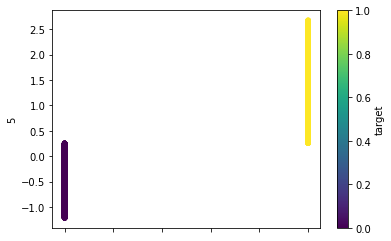

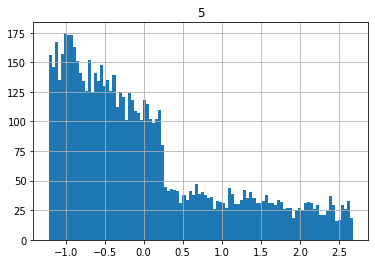

In [95]:
data_plot.plot.scatter(x='target', y='5', c='target', colormap='viridis')
data_plot.hist(column=['5'], bins=100)

In [98]:
data.iloc[:,:].corr().to_csv('corr.csv')

Посмотрим на данные для предсказния

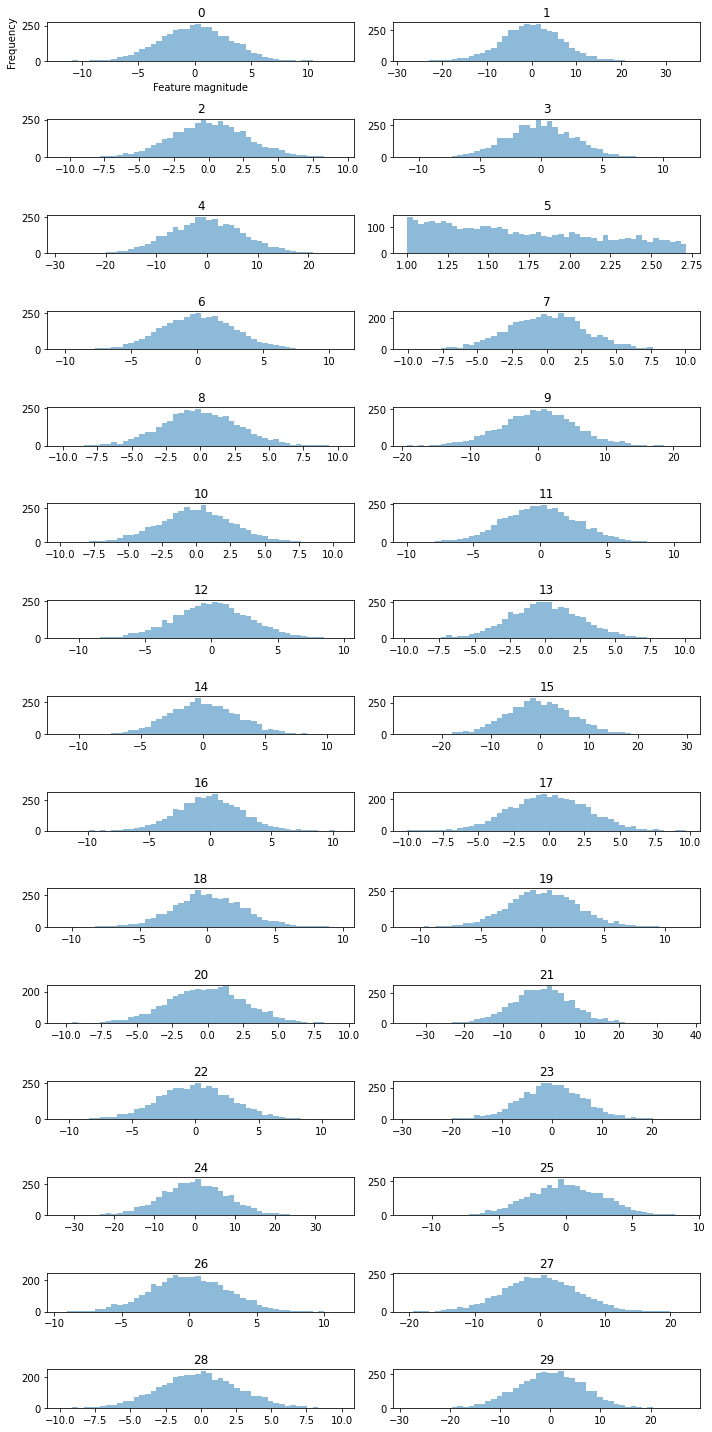

In [31]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(data.iloc[:, i], bins=50)
    ax[i].hist(data_p.iloc[:, i], bins=bins, alpha=.5)
    ax[i].set_title(i)

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")

fig.tight_layout()

# PCA

Для первых 10 компонент нет влияния наличие столбца '5' на получение дисперсий вдоль главных осей. 

In [50]:
pca = PCA(n_components =10); pca.fit(X_no5)
pca.explained_variance_ratio_

array([0.19856027, 0.14691054, 0.13147683, 0.09299343, 0.08242329,
       0.07647059, 0.06126388, 0.03615424, 0.03229011, 0.02016497])

In [49]:
pca = PCA(n_components =10); pca.fit(X)
pca.explained_variance_ratio_

array([0.19849721, 0.14686388, 0.13143506, 0.09296406, 0.08239733,
       0.07644634, 0.06124447, 0.03614275, 0.03228029, 0.02015857])

PCA 2 главные компоненты

In [109]:
pca = PCA(n_components=0.98)
pca_2 = pca.fit_transform(X)
pca.components_.shape

(20, 31)

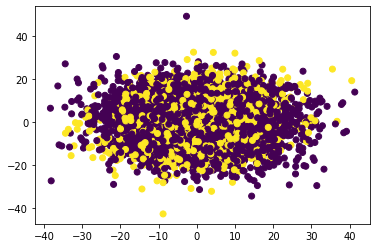

In [73]:
plt.scatter(pca_2[:,0], pca_2[:, 1], c=y)

Kernel pca 

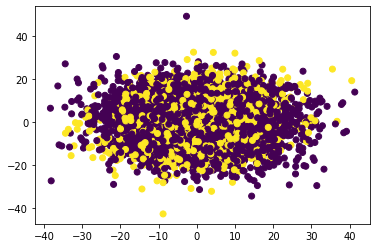

In [75]:
kpca = KernelPCA(kernel='linear', n_components=2)
kpca_2 = kpca.fit_transform(X)
plt.scatter(kpca_2[:,0], kpca_2[:, 1], c=y)

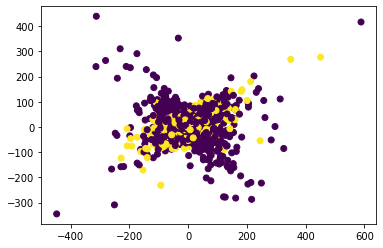

In [76]:
kpca = KernelPCA(kernel='poly', n_components=2)
kpca_2 = kpca.fit_transform(X)
plt.scatter(kpca_2[:,0], kpca_2[:, 1], c=y)

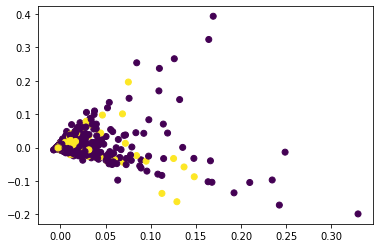

In [77]:
kpca = KernelPCA(kernel='rbf', n_components=2)
kpca_2 = kpca.fit_transform(X)
plt.scatter(kpca_2[:,0], kpca_2[:, 1], c=y)

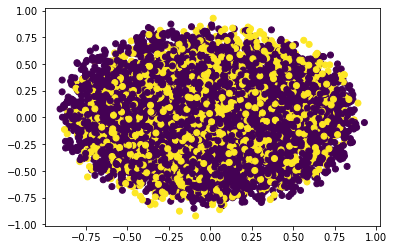

In [78]:
kpca = KernelPCA(kernel='cosine', n_components=2)
kpca_2 = kpca.fit_transform(X)
plt.scatter(kpca_2[:,0], kpca_2[:, 1], c=y)

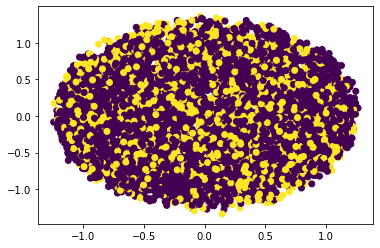

In [79]:
kpca = KernelPCA(kernel='sigmoid', n_components=2)
kpca_2 = kpca.fit_transform(X)
plt.scatter(kpca_2[:,0], kpca_2[:, 1], c=y)

# t-SNE

c:\Users\anton\.virtualenvs\data-dz9rrfYH\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\anton\.virtualenvs\data-dz9rrfYH\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


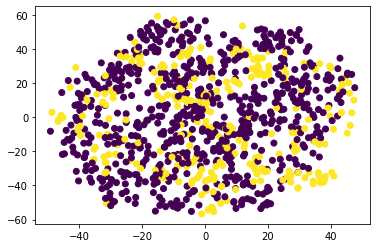

In [123]:
from random import random
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42, perplexity=50, init = 'pca')
data_tsne = tsne.fit_transform(X_no5)
plt.scatter(data_tsne[:1000,0], data_tsne[:1000,1], c=y[:1000])
